In [1]:
import pandas as pd

In [2]:
datos= pd.read_json(r"C:\Users\calde\OneDrive\Escritorio\Challenge TeleconX\TelecomX_Data.json")
datos.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [3]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


# **Comprobación de incoherencias en los datos**


In [4]:
print(datos["Churn"].unique())



['No' 'Yes' '']


In [5]:
datos_columns = datos.columns

In [6]:
df_normalized_customer = pd.json_normalize(datos["customer"])
df_normalized_customer.head()

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3


In [7]:
df_normalized_phone = pd.json_normalize(datos["phone"])
df_normalized_phone.head()

,PhoneService,MultipleLines
0,Yes,No
1,Yes,Yes
2,Yes,No
3,Yes,No
4,Yes,No


In [8]:
df_normalized_account = pd.json_normalize(datos["account"])
df_normalized_account.head()

,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,One year,Yes,Mailed check,65.6,593.3
1,Month-to-month,No,Mailed check,59.9,542.4
2,Month-to-month,Yes,Electronic check,73.9,280.85
3,Month-to-month,Yes,Electronic check,98.0,1237.85
4,Month-to-month,Yes,Mailed check,83.9,267.4


In [9]:
df_telecom = pd.concat(
    [
        datos.drop(columns=datos_columns[2:]).reset_index(drop=True),
        df_normalized_customer.reset_index(drop=True),
        df_normalized_account.reset_index(drop=True),
        df_normalized_phone.reset_index(drop=True)
    ],
    axis=1
)
   

df_telecom.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,PhoneService,MultipleLines
0,0002-ORFBO,No,Female,0,Yes,Yes,9,One year,Yes,Mailed check,65.6,593.3,Yes,No
1,0003-MKNFE,No,Male,0,No,No,9,Month-to-month,No,Mailed check,59.9,542.4,Yes,Yes
2,0004-TLHLJ,Yes,Male,0,No,No,4,Month-to-month,Yes,Electronic check,73.9,280.85,Yes,No
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Month-to-month,Yes,Electronic check,98.0,1237.85,Yes,No
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Month-to-month,Yes,Mailed check,83.9,267.4,Yes,No


In [10]:
df_telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   Contract          7267 non-null   object 
 8   PaperlessBilling  7267 non-null   object 
 9   PaymentMethod     7267 non-null   object 
 10  Charges.Monthly   7267 non-null   float64
 11  Charges.Total     7267 non-null   object 
 12  PhoneService      7267 non-null   object 
 13  MultipleLines     7267 non-null   object 
dtypes: float64(1), int64(2), object(11)
memory usage: 795.0+ KB


In [11]:
datos_boolean = ["Churn", "PaperlessBilling", "PhoneService", "MultipleLines"]
df_telecom[datos_boolean] = df_telecom[datos_boolean].replace({"": "No"})
df_telecom[datos_boolean] = df_telecom[datos_boolean].applymap(lambda x: True if x == "Yes" else False)
df_telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   bool   
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   Contract          7267 non-null   object 
 8   PaperlessBilling  7267 non-null   bool   
 9   PaymentMethod     7267 non-null   object 
 10  Charges.Monthly   7267 non-null   float64
 11  Charges.Total     7267 non-null   object 
 12  PhoneService      7267 non-null   bool   
 13  MultipleLines     7267 non-null   bool   
dtypes: bool(4), float64(1), int64(2), object(7)
memory usage: 596.2+ KB


C:\Users\calde\AppData\Local\Temp\ipykernel_22908\730647787.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_telecom[datos_boolean] = df_telecom[datos_boolean].applymap(lambda x: True if x == "Yes" else False)


In [12]:
print(df_telecom[datos_boolean].head())
print(df_telecom["Churn"].value_counts())


   Churn  PaperlessBilling  PhoneService  MultipleLines
0  False              True          True          False
1  False             False          True           True
2   True              True          True          False
3   True              True          True          False
4   True              True          True          False
Churn
False    5398
True     1869
Name: count, dtype: int64


In [13]:

print(df_telecom["Contract"].unique())
print(df_telecom["Churn"].unique())


['One year' 'Month-to-month' 'Two year']
[False  True]


# **Columna de cuentas diarias**

In [14]:
df_telecom["Charges.Daily"] = df_telecom["Charges.Monthly"] / 30
df_telecom["Charges.Daily"]= df_telecom["Charges.Daily"].round(3)
df_telecom.head()


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,PhoneService,MultipleLines,Charges.Daily
0,0002-ORFBO,False,Female,0,Yes,Yes,9,One year,True,Mailed check,65.6,593.3,True,False,2.187
1,0003-MKNFE,False,Male,0,No,No,9,Month-to-month,False,Mailed check,59.9,542.4,True,True,1.997
2,0004-TLHLJ,True,Male,0,No,No,4,Month-to-month,True,Electronic check,73.9,280.85,True,False,2.463
3,0011-IGKFF,True,Male,1,Yes,No,13,Month-to-month,True,Electronic check,98.0,1237.85,True,False,3.267
4,0013-EXCHZ,True,Female,1,Yes,No,3,Month-to-month,True,Mailed check,83.9,267.4,True,False,2.797


# **Análisis Descriptivo**

In [15]:
df_telecom.describe()

,SeniorCitizen,tenure,Charges.Monthly,Charges.Daily
count,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.162653,32.346498,64.720098,2.157341
std,0.369074,24.571773,30.129572,1.004322
min,0.000000,0.000000,18.250000,0.608000
25%,0.000000,9.000000,35.425000,1.181000
50%,0.000000,29.000000,70.300000,2.343000
75%,0.000000,55.000000,89.875000,2.996000
max,1.000000,72.000000,118.750000,3.958000


# **Distribución grafica de evasión**

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns   
import plotly.express as px 

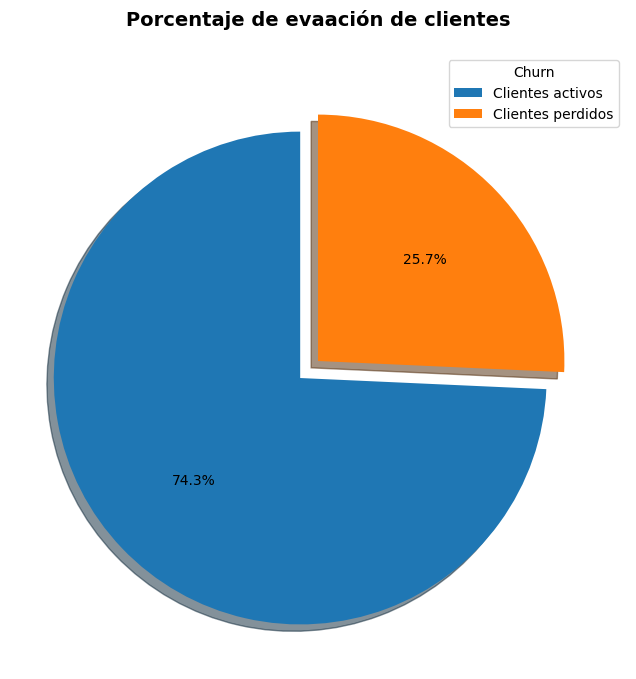

In [17]:
churn_counts = df_telecom["Churn"].value_counts()
churn_counts.plot(kind='pie', labels=None, color=['skyblue', 'salmon'], autopct='%1.1f%%', startangle=90, shadow=True, explode=(0.1, 0), figsize=(8, 8))
plt.title("Porcentaje de evaación de clientes", fontsize=14, fontweight='bold', pad=20)
plt.ylabel('')
plt.legend(title='Churn', labels=["Clientes activos", "Clientes perdidos"],bbox_to_anchor=(1,1),)
plt.show()

# **Recuento de evasión por variables categóricas**

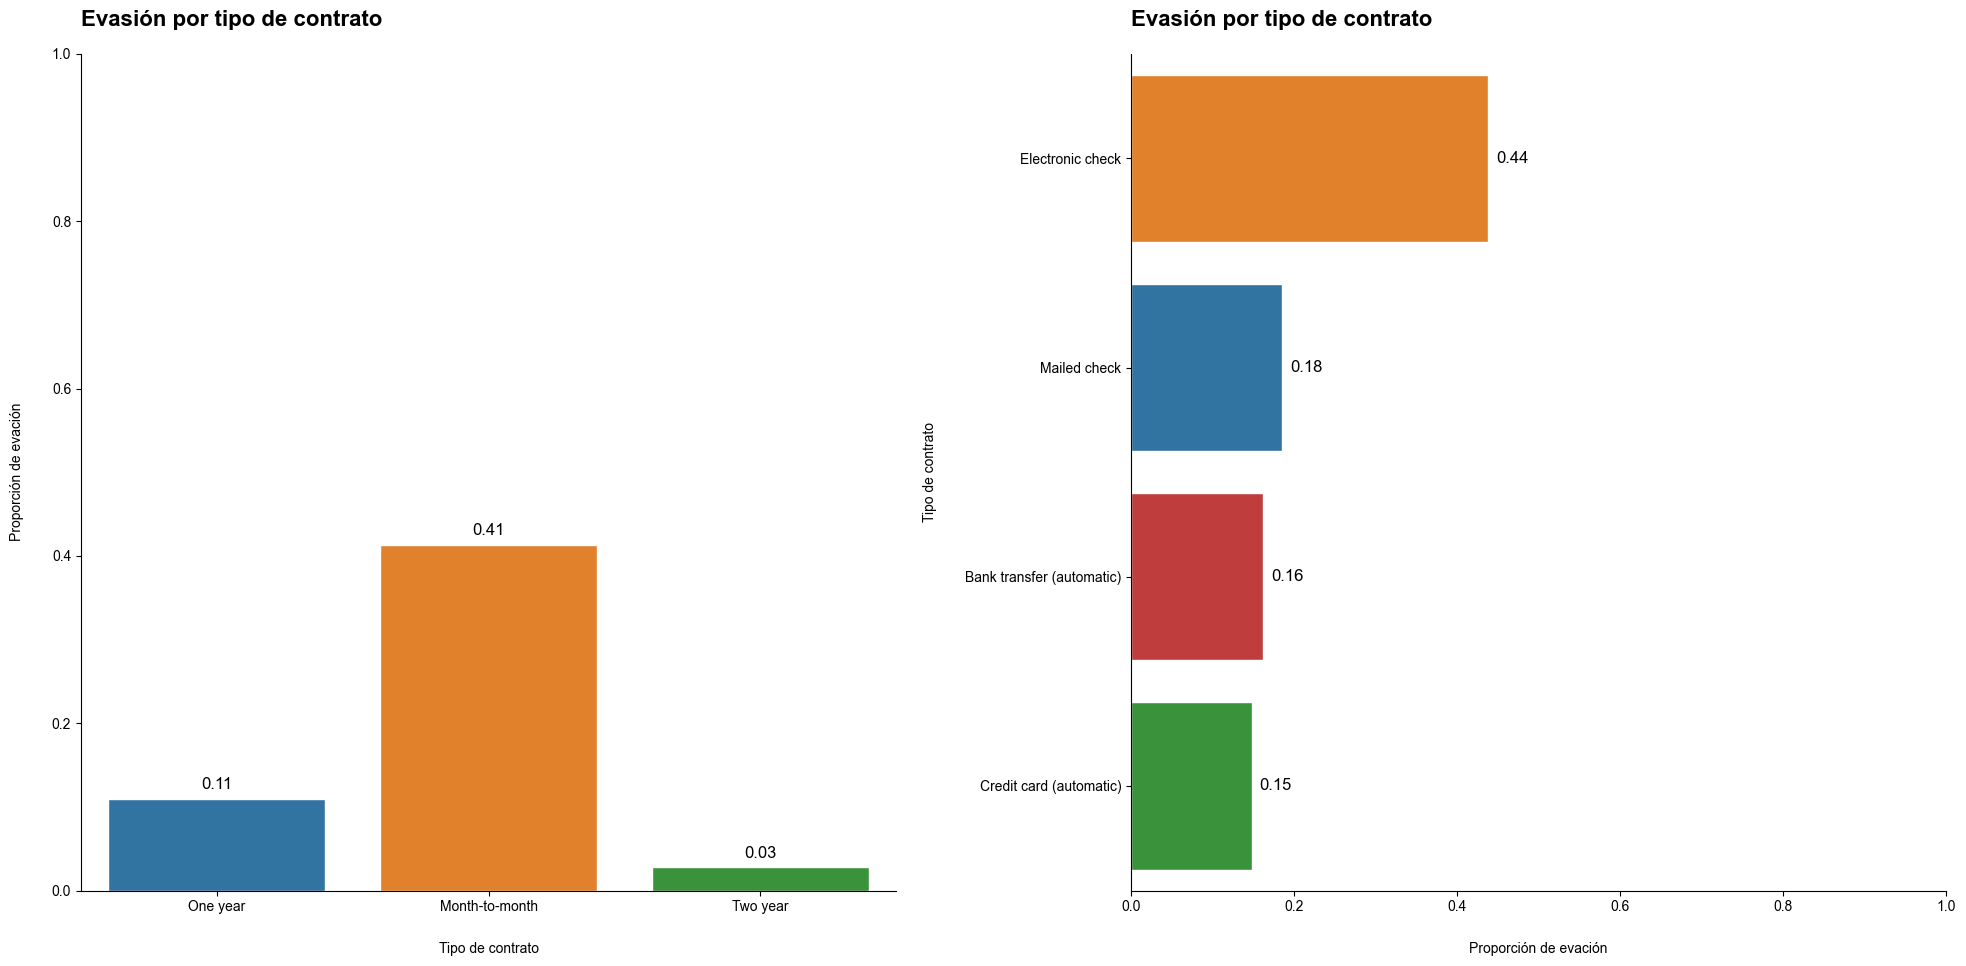

In [18]:


fig, ax = plt.subplots(1,2 , figsize=(20,10))
sns.set(style="white", font_scale=1.5)
sns.despine( left=False, bottom=False)

sns.barplot(data=df_telecom, hue="Contract", y="Churn",x="Contract" , ax= ax[0], palette="tab10", legend=False , errorbar=None  )
ax[0].set_title("Evasión por tipo de contrato",loc='left',fontsize=16, fontweight='bold', pad=20)
ax[0].set_ylabel("Proporción de evación", labelpad= 20) 
ax[0].set_xlabel("Tipo de contrato", labelpad= 20)
ax[0].set_ylim(0, 1)
for p in ax[0].patches:
    ax[0].annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

df_telecom_sorted =df_telecom.sort_values(by="PaymentMethod", ascending=False)
sns.barplot( data=df_telecom_sorted, hue="PaymentMethod", y="PaymentMethod", x="Churn" , ax= ax[1], palette="tab10", legend=False , errorbar=None,order= df_telecom_sorted["PaymentMethod"].value_counts().index  )
ax[1].set_title("Evasión por tipo de contrato",loc='left',fontsize=16, fontweight='bold', pad=20)
ax[1].set_xlabel("Proporción de evación", labelpad= 20) 
ax[1].set_ylabel("Tipo de contrato", labelpad= 20)
ax[1].set_xlim(0, 1)

for p in ax[1].patches:
    ax[1].annotate(
        f'{p.get_width():.2f}',                            
        (p.get_x() + p.get_width() + 0.01, p.get_y() + p.get_height() / 2.),  
        ha='left', va='center',
        fontsize=12, color='black'
    )



plt.tight_layout()
plt.show()  

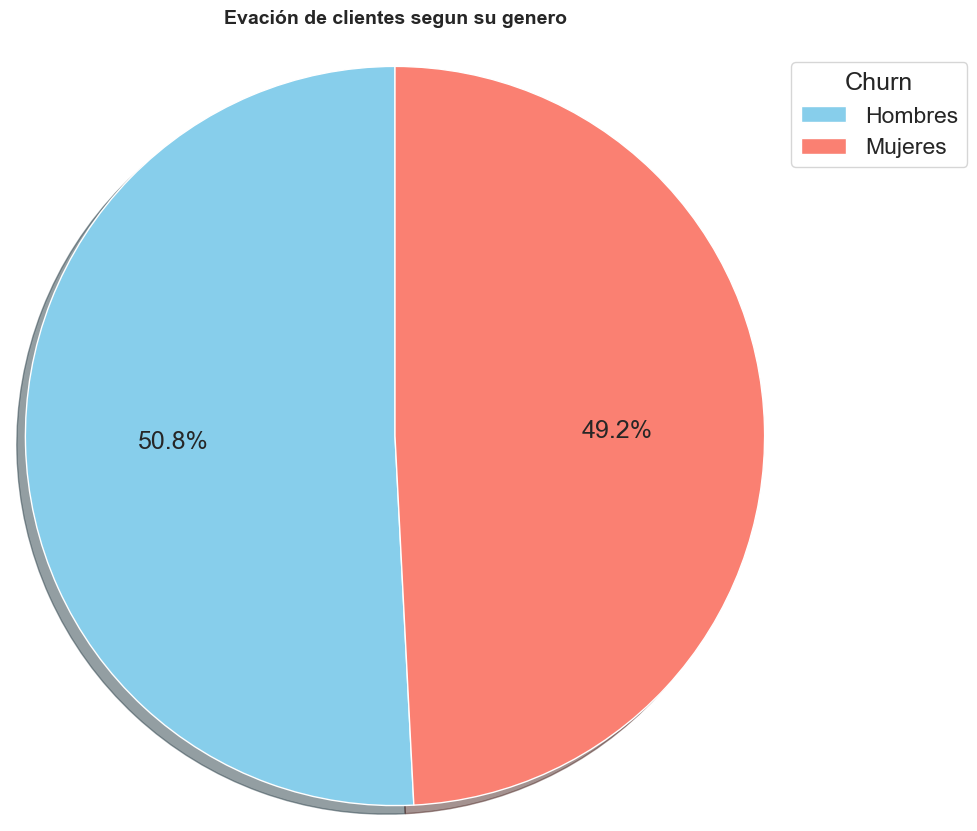

In [19]:
fig, ax = plt.subplots(1,1 , figsize=(20,10))
sns.set(style="white", font_scale=1.5)
sns.despine( left=False, bottom=False)

churn_genero = df_telecom.groupby("gender")["Churn"].mean().reset_index()
ax.pie(churn_genero["Churn"], labels= None, colors=['skyblue', 'salmon'], autopct='%1.1f%%', startangle=90, shadow=True, radius=1.2)
ax.set_title("Evación de clientes segun su genero", fontsize=14, fontweight='bold', pad=20)
plt.legend(title='Churn', labels=["Hombres", "Mujeres"],bbox_to_anchor=(1,1))

# **Conteo de evasión por variables numéricas**

C:\Users\calde\AppData\Local\Temp\ipykernel_22908\3245357244.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_by_tenure = df_telecom.groupby('tenure_group')['Churn'].mean().reset_index()


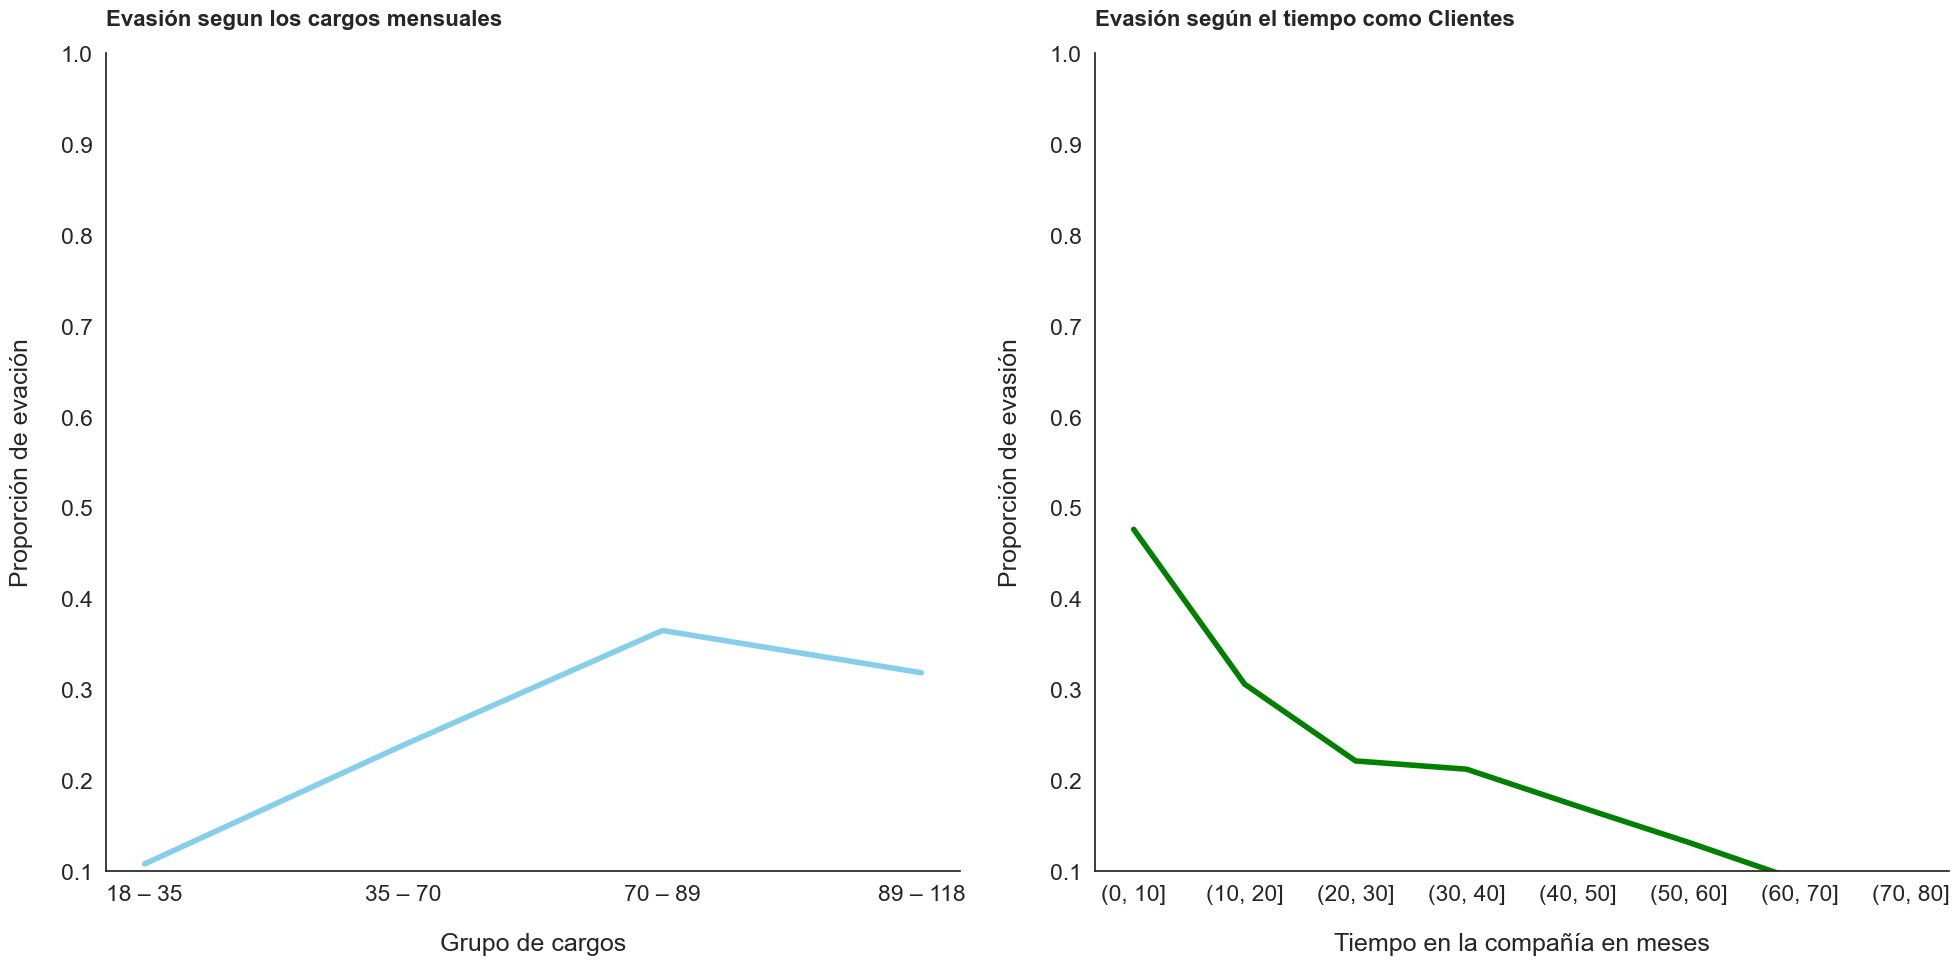

In [36]:
fig, ax = plt.subplots(1,2 , figsize=(20,10))
sns.set(style="white", font_scale=1.5)
sns.despine( left=False, bottom=False)

bins = pd.qcut(df_telecom['Charges.Monthly'], q=[0, 0.25, 0.5, 0.75, 1.0], duplicates='drop')
labels = [f"{int(i.left)} – {int(i.right)}" for i in bins.cat.categories]
df_telecom['Charges.Grupo'] = pd.qcut(df_telecom['Charges.Monthly'], q=[0, 0.25, 0.5, 0.75, 1.0], labels=labels)




sns.lineplot(data=df_telecom,y="Churn", x=df_telecom['Charges.Grupo'] , ax= ax[0], color="skyblue",  legend=False , errorbar=None, linewidth=4 )
ax[0].set_title("Evasión segun los cargos mensuales",loc='left',fontsize=16, fontweight='bold', pad=20)
ax[0].set_ylabel("Proporción de evación", labelpad= 20)
ax[0].set_xlabel("Grupo de cargos", labelpad= 20) 
ax[0].set_ylim(0.1, 1)

df_telecom['tenure_group'] = pd.cut(df_telecom['tenure'], bins=range(0, 81, 10))
churn_by_tenure = df_telecom.groupby('tenure_group')['Churn'].mean().reset_index()
churn_by_tenure['tenure_group'] = churn_by_tenure['tenure_group'].astype(str)

sns.lineplot(data=churn_by_tenure, y="Churn", x='tenure_group', ax=ax[1], color="green", legend=False, errorbar=None, linewidth=4)
ax[1].set_title("Evasión según el tiempo como Clientes", loc='left', fontsize=16, fontweight='bold', pad=20)
ax[1].set_xlabel("Tiempo en la compañía en meses", labelpad=20)
ax[1].set_ylabel("Proporción de evasión", labelpad=20)
ax[1].set_ylim(0.1, 1)



plt.tight_layout()
plt.show()

In [47]:

df_telecom['Charges.Total'] = pd.to_numeric(df_telecom['Charges.Total'], errors='coerce')
df_telecom = df_telecom[df_telecom['Charges.Total'].notna()]

bins = pd.qcut(df_telecom['Charges.Total'], q=[0, 0.25, 0.5, 0.75, 1.0], duplicates='drop')
labels = [f"{int(i.left)} – {int(i.right)}" for i in bins.cat.categories]
df_telecom['tcharges_group'] = pd.qcut(df_telecom['Charges.Total'], q=[0, 0.25, 0.5, 0.75, 1.0], labels=labels, duplicates='drop')

# Agrupar y graficar
churn_by_tcharges = df_telecom.groupby('tcharges_group')['Churn'].mean().reset_index()

fig = px.line(
    churn_by_tcharges,
    x='tcharges_group',
    y='Churn',
    title="Proporción de evasión según cargo total",
    labels={'tcharges_group': 'Cargo total (cuartiles)', 'Churn': 'Proporción de evasión'},
    markers=True
)

fig.update_traces(line=dict(color='green', width=4))
fig.update_layout(title_x=0.0)
fig.show()

C:\Users\calde\AppData\Local\Temp\ipykernel_22908\4094594705.py:9: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.




# **Informe de Análisis de Evasión de Clientes en TelecomX**



##  **Introducción**
El objetivo de este análisis es identificar y comprender los patrones de evasión de clientes en TelecomX, utilizando datos históricos de clientes. La evasión de clientes es un problema crítico en la industria de telecomunicaciones, ya que representa la pérdida de clientes y, por ende, de ingresos.



## **Objetivos específicos**:

-Analizar la tasa de evasión y su distribución.

-Identificar variables clave asociadas a la evasión.

-Proponer estrategias para reducir la evasión basadas en insights obtenidos.



## **Limpieza y Tratamiento de Datos**
1. **Importación y Exploración Inicial**
    Se importaron los datos desde un archivo JSON utilizando pandas.

    Los datos contienen información sobre clientes, como:

    -customerID: Identificador único del cliente.

    -Evasión: Indicador binario (Sí/No) de si el cliente abandonó el servicio.

    -Variables categóricas (gender, Partner, Dependents, etc.).

    -Variables numéricas (tenure, Charges.Monthly, Charges.Total, etc.).

2. **Limpieza y Transformación**
    -Datos faltantes: Se verificó que no hubiera valores nulos en las columnas clave.

    -Normalización de datos anidados: Se utilizó json_normalize para desanidar campos JSON en columnas separadas.

    -Conversión de variables categóricas:

    -Evasión se transformó a booleano (True para "Sí", False para "No").

    -Otras variables como PaperlessBilling, PhoneService, y MultipleLines también se convirtieron a booleanos.

    -Creación de nuevas métricas:

    -Charges.Daily: Cálculo del costo diario basado en Charges.Monthly.




## **Análisis Exploratorio de Datos (EDA)**
1. ***Distribución de la Evasión***

**Tasa de Evasión**:

26.7% de los clientes abandonaron el servicio.

73.3% permanecieron activos.

2. ***Relación entre Variables y Evasión***

a. **Género**

    No hay una diferencia significativa en la tasa de evasión entre hombres y mujeres.

b. **Servicios Adicionales**

    MultipleLines: Los clientes con múltiples líneas tienen una tasa de evasión ligeramente mayor.

    InternetService: Los clientes con servicio de fibra óptica tienden a abandonar más que los de DSL.

c. **Facturación y Contrato**

    PaperlessBilling: Los clientes con facturación electrónica tienen mayor evasión.

    Contract: Los clientes con contratos mensuales presentan mayor evasión que aquellos con contratos anuales o bianuales.

d. **Cargos y Antigüedad (tenure)**

    Clientes con baja antigüedad (tenure < 12 meses): Mayor probabilidad de evasión.

    Clientes con cargos altos (Charges.Monthly): Más propensos a abandonar.




##  ***Conclusiones e Insights***
**Factores clave asociados a la Evasión**:

    -Contratos mensuales y facturación electrónica están correlacionados con mayor evasión.

    -Clientes nuevos (poca antigüedad) son más vulnerables a abandonar el servicio.

    -Servicios de fibra óptica tienen mayor tasa de evasión, posiblemente por competencia o insatisfacción con el servicio.

    -Clientes con múltiples líneas presentan mayor evasión, lo que sugiere que la complejidad del servicio podría afectar la retención.

    -No hay diferencias significativas por género, lo que indica que la evasión no está influenciada por esta variable.



## **Recomendaciones**
1. Mejorar la Retención de Clientes Nuevos
Programas de onboarding para clientes con menos de 12 meses.

Ofertas especiales para fidelización en los primeros meses.

2. Revisar Contratos Mensuales
Incentivar contratos anuales con descuentos o beneficios adicionales.

Flexibilizar condiciones de cancelación para reducir frustración.

3. Optimizar Servicios de Fibra Óptica
Encuestas de satisfacción para identificar problemas específicos.

Mejorar soporte técnico y velocidad prometida vs. entregada.

4. Rediseñar Facturación Electrónica
Simplificar el proceso y ofrecer recordatorios personalizados.

Incluir beneficios por usar facturación digital (ej: descuentos).



## **Conclusión Final**
El análisis revela que la evasión de clientes en TelecomX está influenciada principalmente por el tipo de contrato, la antigüedad del cliente y el servicio de internet. Implementar estrategias de retención enfocadas en estos factores podría reducir significativamente la evasión y mejorar la rentabilidad del negocio.

 **Próximos pasos**:

Profundizar en análisis de satisfacción del cliente.

Implementar pruebas A/B para evaluar efectividad de estrategias.

